In [23]:
### Carregar as Libraries
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std

### Importing Dataset
dataset = pd.read_csv('CNN_features_extracted_AVG.csv',encoding='utf-8')

In [24]:
# Obtendo os nomes das colunas Numéricas
tipos_numericos = ['int32', 'int64', 'float16', 'float32', 'float64']
cols_num = dataset.select_dtypes(include=tipos_numericos)

## Selecionando os atributos numéricos
colunas_numericas = list(cols_num.columns)

## Pegar a classe
coluna_classe = dataset['classe']

## Separando os atributos da classe
X = dataset[colunas_numericas] # Features
y = dataset.classe             # Target variable (classe)

In [3]:
## Carregando o algoritmo / método / técnica Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [27]:
# 10-fold CV
kf = KFold(n_splits=10, random_state=1, shuffle=True)

# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=9)

# Model Accuracy
scores = cross_val_score(dtc, X, y, scoring='accuracy', cv=kf)
print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))

# Matriz de confusão p/ k fold
y_pred = cross_val_predict(dtc, X, y, cv=kf)
confusion_matrix(y, y_pred)

Accuracy: 0.601 (0.047)


array([[224, 176],
       [152, 248]], dtype=int64)

In [13]:
def evaluate_model(X, y, depth_range):
    
    # 10-fold CV
    kf = KFold(n_splits=10, random_state=1, shuffle=True)
    
    for depth in depth_range:
        # Criar um objeto classificador de árvore de decisão
        dtc = DecisionTreeClassifier(criterion="entropy", max_depth=depth)

        # Acurácia do Modelo
        scores = cross_val_score(dtc, X, y, scoring='accuracy', cv=kf)
        print(f'max_depth={depth}: Accuracy: {mean(scores):.3f} ({std(scores):.3f})')

        # Matriz de confusão p/ k-fold
        y_pred = cross_val_predict(dtc, X, y, cv=kf)
        print(f'Matriz de confusão para max_depth={depth}:')
        print(confusion_matrix(y, y_pred))
        print()  # Nova linha para separar os resultados



In [26]:
# Range de valores de max_depth para testar
depth_range = range(3, 10)

# Chame a função com seus dados e o range de profundidades
evaluate_model(X, y, depth_range)

max_depth=3: Accuracy: 0.559 (0.050)
Matriz de confusão para max_depth=3:
[[150 250]
 [103 297]]

max_depth=4: Accuracy: 0.585 (0.051)
Matriz de confusão para max_depth=4:
[[201 199]
 [132 268]]

max_depth=5: Accuracy: 0.600 (0.050)
Matriz de confusão para max_depth=5:
[[219 181]
 [143 257]]

max_depth=6: Accuracy: 0.590 (0.055)
Matriz de confusão para max_depth=6:
[[203 197]
 [136 264]]

max_depth=7: Accuracy: 0.599 (0.042)
Matriz de confusão para max_depth=7:
[[208 192]
 [128 272]]

max_depth=8: Accuracy: 0.588 (0.043)
Matriz de confusão para max_depth=8:
[[214 186]
 [146 254]]

max_depth=9: Accuracy: 0.598 (0.041)
Matriz de confusão para max_depth=9:
[[227 173]
 [145 255]]



In [28]:
cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

print()

# Model Accuracy
scores = cross_val_score(dtc, X, y, scoring='accuracy', cv=kf)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Fold:1, Train set: 720, Test set:80
Fold:2, Train set: 720, Test set:80
Fold:3, Train set: 720, Test set:80
Fold:4, Train set: 720, Test set:80
Fold:5, Train set: 720, Test set:80
Fold:6, Train set: 720, Test set:80
Fold:7, Train set: 720, Test set:80
Fold:8, Train set: 720, Test set:80
Fold:9, Train set: 720, Test set:80
Fold:10, Train set: 720, Test set:80

Accuracy: 0.597 (0.053)


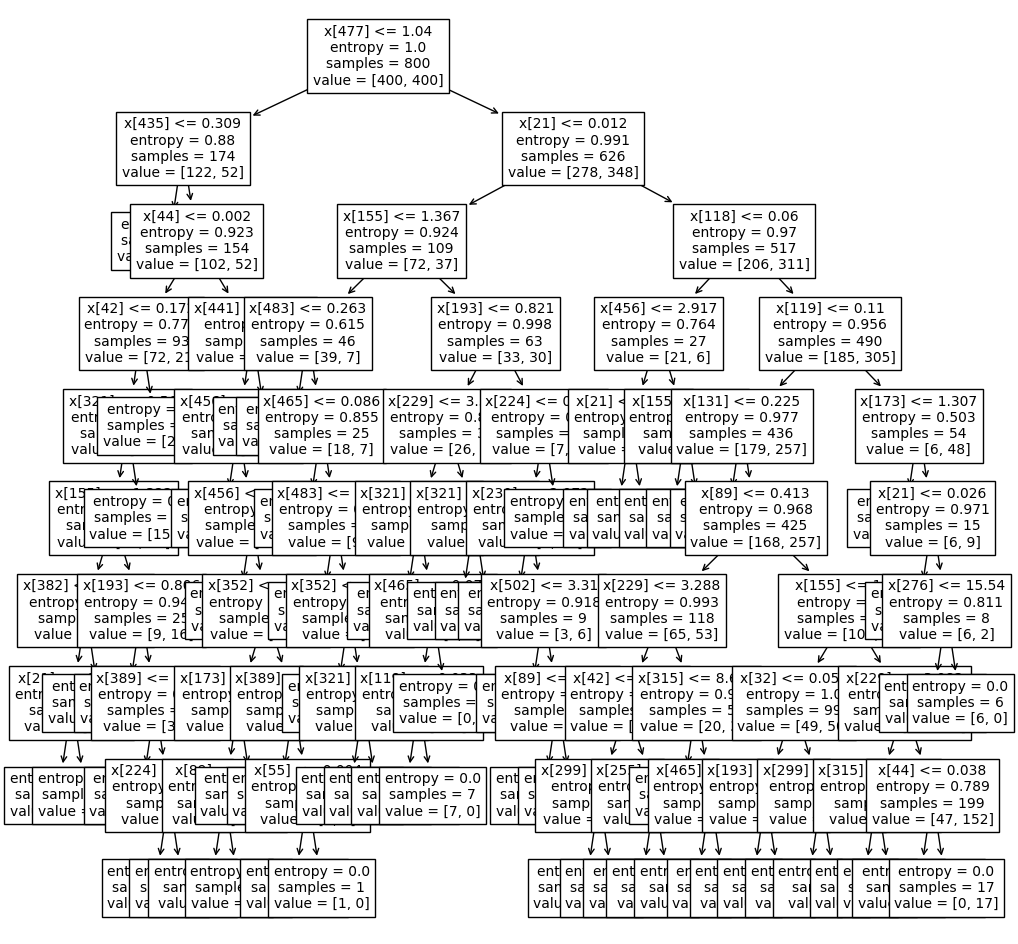

In [29]:
# Mostrando (plotando) a árvore gerada
from sklearn import tree
import matplotlib.pyplot as plt

# set plot size (denoted in inches)
plt.figure(figsize=(12,12))

# Treinamento de um holdout 50-50 para observação da arvore gerada.
dtc.fit(X, y) # - adicionado por Cephas. Treinamento de um holdout 50-50 para observação da arvore gerada.
tree.plot_tree(dtc, fontsize=10)
plt.show()

